In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


In [52]:
dataset = pd.read_csv('Car_Insurance_Claim.csv')
dataset = dataset.set_index('ID')

In [53]:
dataset.isna().sum().sort_values()

AGE                      0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
MARRIED                  0
PAST_ACCIDENTS           0
VEHICLE_YEAR             0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
VEHICLE_OWNERSHIP        0
OUTCOME                  0
ANNUAL_MILEAGE         957
CREDIT_SCORE           982
dtype: int64

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(dataset[['ANNUAL_MILEAGE', 'CREDIT_SCORE']])
dataset[['ANNUAL_MILEAGE', 'CREDIT_SCORE']] = imputer.transform(dataset[['ANNUAL_MILEAGE', 'CREDIT_SCORE']])
dataset.isna().sum().sort_values()


AGE                    0
DUIS                   0
SPEEDING_VIOLATIONS    0
VEHICLE_TYPE           0
ANNUAL_MILEAGE         0
POSTAL_CODE            0
CHILDREN               0
MARRIED                0
VEHICLE_YEAR           0
VEHICLE_OWNERSHIP      0
CREDIT_SCORE           0
INCOME                 0
EDUCATION              0
DRIVING_EXPERIENCE     0
RACE                   0
GENDER                 0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [55]:
numeric_data = ['CREDIT_SCORE',	'VEHICLE_OWNERSHIP','MARRIED','CHILDREN','POSTAL_CODE',	'ANNUAL_MILEAGE','SPEEDING_VIOLATIONS',	'DUIS',	'PAST_ACCIDENTS']
X = dataset[numeric_data]
y = dataset['OUTCOME']

In [56]:
X.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300
std,0.130752,0.459578,0.500022,0.463008,18915.613855,2680.167384,2.241966,0.55499,1.652454
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000
25%,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000
50%,0.515813,1.000000,0.000000,1.000000,10238.000000,11697.003207,0.000000,0.00000,0.000000
75%,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)


In [59]:
models = {'LogisticRegression': LogisticRegression(),'KNN': KNeighborsClassifier(),'DecisionTree': DecisionTreeClassifier()}
results = []

In [60]:
for model in models.values():
    kfold = KFold(n_splits=6)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)

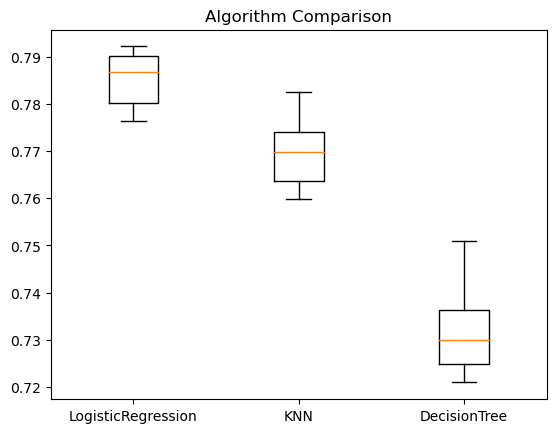

In [62]:
plt.boxplot(results, labels=models.keys())
plt.title('Algorithm Comparison')
plt.show()

In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
print(y_pred_proba[0])


0.06959961964878981


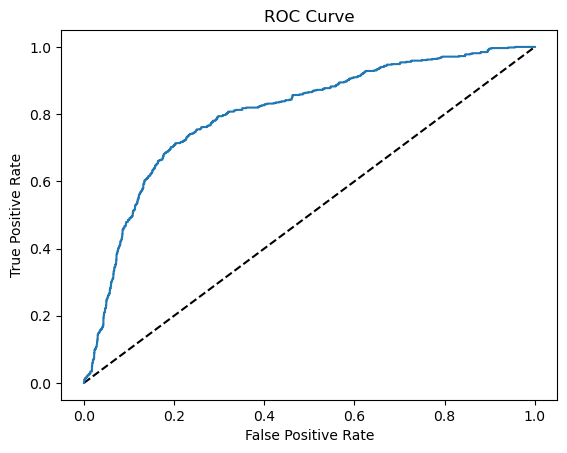

Accuracy Score: 0.7855
ROC AUC Score: 0.8014964475646558
Confusion Matrix:
 [[1211  202]
 [ 227  360]]


In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
